In [3]:
import pandas as pd
import numpy as np
import cv2 # import OpenCV
import matplotlib.pyplot as plt

In [4]:
# path='G:/My Drive/Data_Science/Projects/bloody_spy_blast/data/principal/'
path='data/principal/'
img_info = pd.read_csv(path + 'img_info.csv')
cell_types = pd.read_csv(path + 'cell_types.csv')
master = pd.read_csv(path + 'master.csv')

In [5]:
cell_types.fillna('To be defined',inplace=True)
cell_types

cell_type  \
0                   Arifact   
1          Band neutrophils   
2                  Basophil   
3    Blast, no lineage spec   
4               Eosinophils   
5              Erythroblast   
6         Giant thrombocyte   
7                Lymphocyte   
8       Lymphocyte, variant   
9             Metamyelocyte   
10                 Monocyte   
11                Myelocyte   
12             Plasma cells   
13            Prolymphocyte   
14              Promonocyte   
15             Promyelocyte   
16    Segmented neutrophils   
17             Smudge cells   
18  Thrombocyte aggregation   
19             Unidentified   
20       Young Unidentified   

                                   cell_type_category    cell_type_category2  \
0                                               Other                Arifact   
1                                         neutrophils            neutrophils   
2                                           basophils              basophils   
3                                               Blast                  Blast   
4                                         eosinophils            eosinophils   
5                                       erythroblasts          erythroblasts   
6                            platelets (thrombocytes)           thrombocytes   
7                                         lymphocytes            lymphocytes   
8                                         lymphocytes            lymphocytes   
9   immature granulocytes (metamyelocytes, myelocy...  immature granulocytes   
10                                          monocytes              monocytes   
11  immature granulocytes (metamyelocytes, myelocy...  immature granulocytes   
12                                              Other            lymphocytes   
13                                              Other            lymphocytes   
14                                              Other              monocytes   
15  immature granulocytes (metamyelocytes, myelocy...  immature granulocytes   
16                                        neutrophils            neutrophils   
17                                              Other                 Smudge   
18                           platelets (thrombocytes)           thrombocytes   
19                                       Unidentified           Unidentified   
20                                       Unidentified           Unidentified   

         maturity         parent  \
0   To be defined  To be defined   
1   To be defined  To be defined   
2          level4     myeloblast   
3   To be defined  To be defined   
4          level4     myeloblast   
5   To be defined  To be defined   
6   To be defined  To be defined   
7        level3-4       lymphoid   
8        level3-4       lymphoid   
9   To be defined  To be defined   
10         level4     myeloblast   
11  To be defined  To be defined   
12         level5   B lymphocyte   
13  To be defined  To be defined   
14  To be defined  To be defined   
15  To be defined  To be defined   
16  To be defined  To be defined   
17  To be defined  To be defined   
18         level4  megakaryocyte   
19  To be defined  To be defined   
20  To be defined  To be defined   

                                           definition  
0                                       To be defined  
1                                       To be defined  
2                                       To be defined  
3   Blasts are precursors to the mature, circulati...  
4                                       To be defined  
5                                       To be defined  
6                                       To be defined  
7                                       To be defined  
8                                       To be defined  
9                                       To be defined  
10                                      To be defined  
11                                      To be defined  
12                                      To be defined

In [6]:
df = pd.merge(img_info,cell_types,how='outer') # merge on column cell_type
df = pd.merge(df,master,how='outer') # merge on column cell_type

In [7]:
print(df.isna().sum())
df[df.cell_type_category.isna()].cell_type
df[df.filename.isna()].Patient_ID.values
# missing patient in images database
# df.dropna(inplace=True) # on supprime ces lignes pour ne pas biaiser l'analyse

filename               0
Patient_ID             0
slide_status           0
cell_type              0
img_name               0
img_type               0
img_dim                0
img_height             0
img_width              0
img_pixels             0
cell_type_category     0
cell_type_category2    0
maturity               0
parent                 0
definition             0
Diagnosis              0
Cohort                 0
Age at Diagnosis       0
Gender                 0
dtype: int64


array([], dtype=object)

In [8]:
print(df.cell_type_category.value_counts())
# print(df.cell_type_category2.value_counts())

Unidentified                                                            10123
lymphocytes                                                              3869
Blast                                                                    3310
Other                                                                    3086
neutrophils                                                              2263
monocytes                                                                1319
immature granulocytes (metamyelocytes, myelocytes and promyelocytes)      947
erythroblasts                                                             521
eosinophils                                                               108
platelets (thrombocytes)                                                   88
basophils                                                                  53
Name: cell_type_category, dtype: int64


In [9]:
# on identifie les cellules qu'on n'a pas encore catégorisées
df[df.cell_type_category=='Other'].cell_type.value_counts()

Smudge cells     2931
Promonocyte        71
Plasma cells       58
Arifact            25
Prolymphocyte       1
Name: cell_type, dtype: int64

In [10]:
df.img_dim.value_counts()

363 x 360      19885
365 x 360       5508
364 x 360        154
363 x 416         10
0 x 0              9
               ...  
363 x 472          1
2939 x 2928        1
2955 x 2928        1
2942 x 2928        1
2880 x 2864        1
Name: img_dim, Length: 73, dtype: int64

In [11]:
print(df.cell_type.value_counts().index)
print(df[:100].cell_type.value_counts().index)

Index(['Unidentified', 'Lymphocyte', 'Blast, no lineage spec', 'Smudge cells',
       'Segmented neutrophils', 'Monocyte', 'Promyelocyte', 'Erythroblast',
       'Lymphocyte, variant', 'Myelocyte', 'Band neutrophils', 'Eosinophils',
       'Metamyelocyte', 'Promonocyte', 'Giant thrombocyte', 'Plasma cells',
       'Basophil', 'Arifact', 'Thrombocyte aggregation', 'Young Unidentified',
       'Prolymphocyte'],
      dtype='object')
Index(['Unidentified', 'Lymphocyte', 'Blast, no lineage spec', 'Erythroblast',
       'Eosinophils', 'Giant thrombocyte'],
      dtype='object')


In [26]:
# retrieve information on cell type based on filename.
# we will store information under column cell_type2

df['img_code']=df.img_name.apply(lambda x: x.split('_')[0])

to_replace =[]
for code in df.img_code.value_counts().index:
    if (code[:2]=='10') | (code[:2]=='E0') | (code[:2]=='D0'):
        to_replace.append(code)
    elif code=='USRWBC2':
        to_replace.append(code)
df['img_code'] = df.img_code.replace(to_replace,'UNDEFINED')
print(df.img_code.value_counts().index)

df2=df[df.img_code!='UNDEFINED']
Mapping = df2[df2.cell_type!='Unidentified'].groupby(['cell_type','img_code']).agg({'filename':'count'})
Mapping=Mapping.reset_index().rename(columns={'filename':'count','cell_type':'cell_type2'}).sort_values(by=['cell_type2','count'],ascending=False)
m2 =Mapping.head(0)
for ct in Mapping.cell_type2.unique():
    m2 = pd.concat([m2,Mapping[Mapping.cell_type2==ct].head(1)])
Mapping=m2[['cell_type2','img_code']]
print(len(Mapping.cell_type2.unique())-len(Mapping))

display(Mapping)

df = pd.merge(df,Mapping) # merge on img_code
df['isCellTypeSure']= (df.cell_type == df.cell_type2)
df.head()

Index(['LY', 'BL', 'SMU', 'SNE', 'MO', 'PMY', 'ERB', 'VLY', 'MY', 'BNE', 'EO',
       'PMO', 'MMY', 'GT', 'PC', 'BA', 'ART', 'ERC', 'PLY'],
      dtype='object')
0


cell_type2 img_code
44  Thrombocyte aggregation      ERC
42             Smudge cells      SMU
40    Segmented neutrophils      SNE
36             Promyelocyte      PMY
32              Promonocyte      PMO
31            Prolymphocyte      PLY
30             Plasma cells       PC
29                Myelocyte       MY
27                 Monocyte       MO
21            Metamyelocyte      MMY
18      Lymphocyte, variant      VLY
14               Lymphocyte       LY
12        Giant thrombocyte       GT
11             Erythroblast      ERB
10              Eosinophils       EO
4    Blast, no lineage spec       BL
2                  Basophil       BA
1          Band neutrophils      BNE
0                   Arifact      ART

filename  Patient_ID slide_status  \
0  data\principal\All\All\Patient_00\Signed slide...  Patient_00       Signed   
1  data\principal\All\All\Patient_00\Signed slide...  Patient_00       Signed   
2  data\principal\All\All\Patient_00\Signed slide...  Patient_00       Signed   
3  data\principal\All\All\Patient_00\Signed slide...  Patient_00       Signed   
4  data\principal\All\All\Patient_00\Signed slide...  Patient_00       Signed   

                cell_type         img_name img_type    img_dim  img_height  \
0  Blast, no lineage spec  BL_15336348.jpg      jpg  363 x 360         363   
1  Blast, no lineage spec  BL_15336349.jpg      jpg  363 x 360         363   
2  Blast, no lineage spec  BL_15336361.jpg      jpg  363 x 360         363   
3  Blast, no lineage spec  BL_15336369.jpg      jpg  363 x 360         363   
4  Blast, no lineage spec  BL_15336376.jpg      jpg  363 x 360         363   

   img_width  img_pixels  ...         parent  \
0        360      130680  ...  To be defined   
1        360      130680  ...  To be defined   
2        360      130680  ...  To be defined   
3        360      130680  ...  To be defined   
4        360      130680  ...  To be defined   

                                          definition Diagnosis     Cohort  \
0  Blasts are precursors to the mature, circulati...       APL  Discovery   
1  Blasts are precursors to the mature, circulati...       APL  Discovery   
2  Blasts are precursors to the mature, circulati...       APL  Discovery   
3  Blasts are precursors to the mature, circulati...       APL  Discovery   
4  Blasts are precursors to the mature, circulati...       APL  Discovery   

  Age at Diagnosis  Gender img_code              cell_type2  \
0               29  Female       BL  Blast, no lineage spec   
1               29  Female       BL  Blast, no lineage spec   
2               29  Female       BL  Blast, no lineage spec   
3               29  Female       BL  Blast, no lineage spec   
4               29  Female       BL  Blast, no lineage spec   

  isCellTypeAlignedToImgName isCellTypeSure  
0                       True           True  
1                       True           True  
2                       True           True  
3                       True           True  
4                       True           True  

[5 rows x 23 columns]

In [36]:
# white balance function, for every channel independently
def wb(channel, perc = 0.05):
    mi, ma = (np.percentile(channel, perc), np.percentile(channel,100.0-perc))
    channel = np.uint8(np.clip((channel-mi)*255.0/(ma-mi), 0, 255))
    return channel

# function to display bllod cell images
def show_blood_cells(df,viz_opt='color',npc=3,shuffle=False):
    """
    df : dataframe of blood cells
    viz_opt : vizualization options : color, gray or WB (white balance)
    npc : number of images displayed per cell type
    """

    path='data\\principal\\All\\All\\'
    cell_types = df.cell_type.value_counts().index # cell types sorted by number of apparitions in the dataset
    # npc = 3 # number of displayed images per cell type
    N=len(cell_types)*npc  # number total of displayed images
    p=6 # number of total columns
    n=N//p if N%p==0 else N//p+1 # number of rows

    select_index=[]
    for ct in cell_types: 
        all_index_ct=df[df.cell_type==ct].index
        new_select_index=np.random.choice(all_index_ct, size=npc) # on en choisit npc par cell_type
        select_index=np.concatenate([select_index,new_select_index]).astype(int)
    select_index
    
    if shuffle==True:
        np.random.shuffle(select_index)
    
    fig, axis = plt.subplots(n, p,figsize=(p*4,n*4))
    k=1
    for i in select_index:

        # filename = path+'\\'+df.loc[i,'Patient_ID']+'\\'+df.loc[i,'slide_o']+'\\'+df.loc[i,'cell_type_o']+'\\'+df.loc[i,'img']
        filename =df.loc[i,'filename']
        
        if viz_opt == 'gray':
            img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
        elif viz_opt == 'color':
            img = cv2.imread(filename,cv2.IMREAD_COLOR)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # conversion from BGR to RGB
        elif viz_opt =='WB':
            img = cv2.imread(filename,cv2.IMREAD_COLOR)
            img  = np.dstack([wb(channel, 0.1) for channel in cv2.split(img)] ) # if want to visualize in white balance
        elif viz_opt =='edges':
            img = cv2.imread(filename, cv2.IMREAD_COLOR)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            filter = cv2.GaussianBlur(img,(5,5),0) # to remove noise
            img = cv2.Canny(filter,50,100) # to detect edges

        plt.subplot(n,p,k)
        plt.imshow(img)
        # plt.xticks([])
        # plt.yticks([])
        plt.axis('off')
        patient_id =df.loc[i,'Patient_ID']
        cell_type=df.loc[i,'cell_type']
        gender = df.loc[i,'Gender']
        age=df.loc[i,'Age at Diagnosis']
        diag=df.loc[i,'Diagnosis']
        # plt.title(str(i)+' - ' +gender+' '+str(age)+' - ' +diag+ '\n'+df.loc[i,'cell_type'])
        plt.title(patient_id+' - ' +gender+' '+str(age)+' - ' +diag+ '\n'+df.loc[i,'cell_type'])
        k+=1

    plt.show()
    
    return df.loc[select_index]

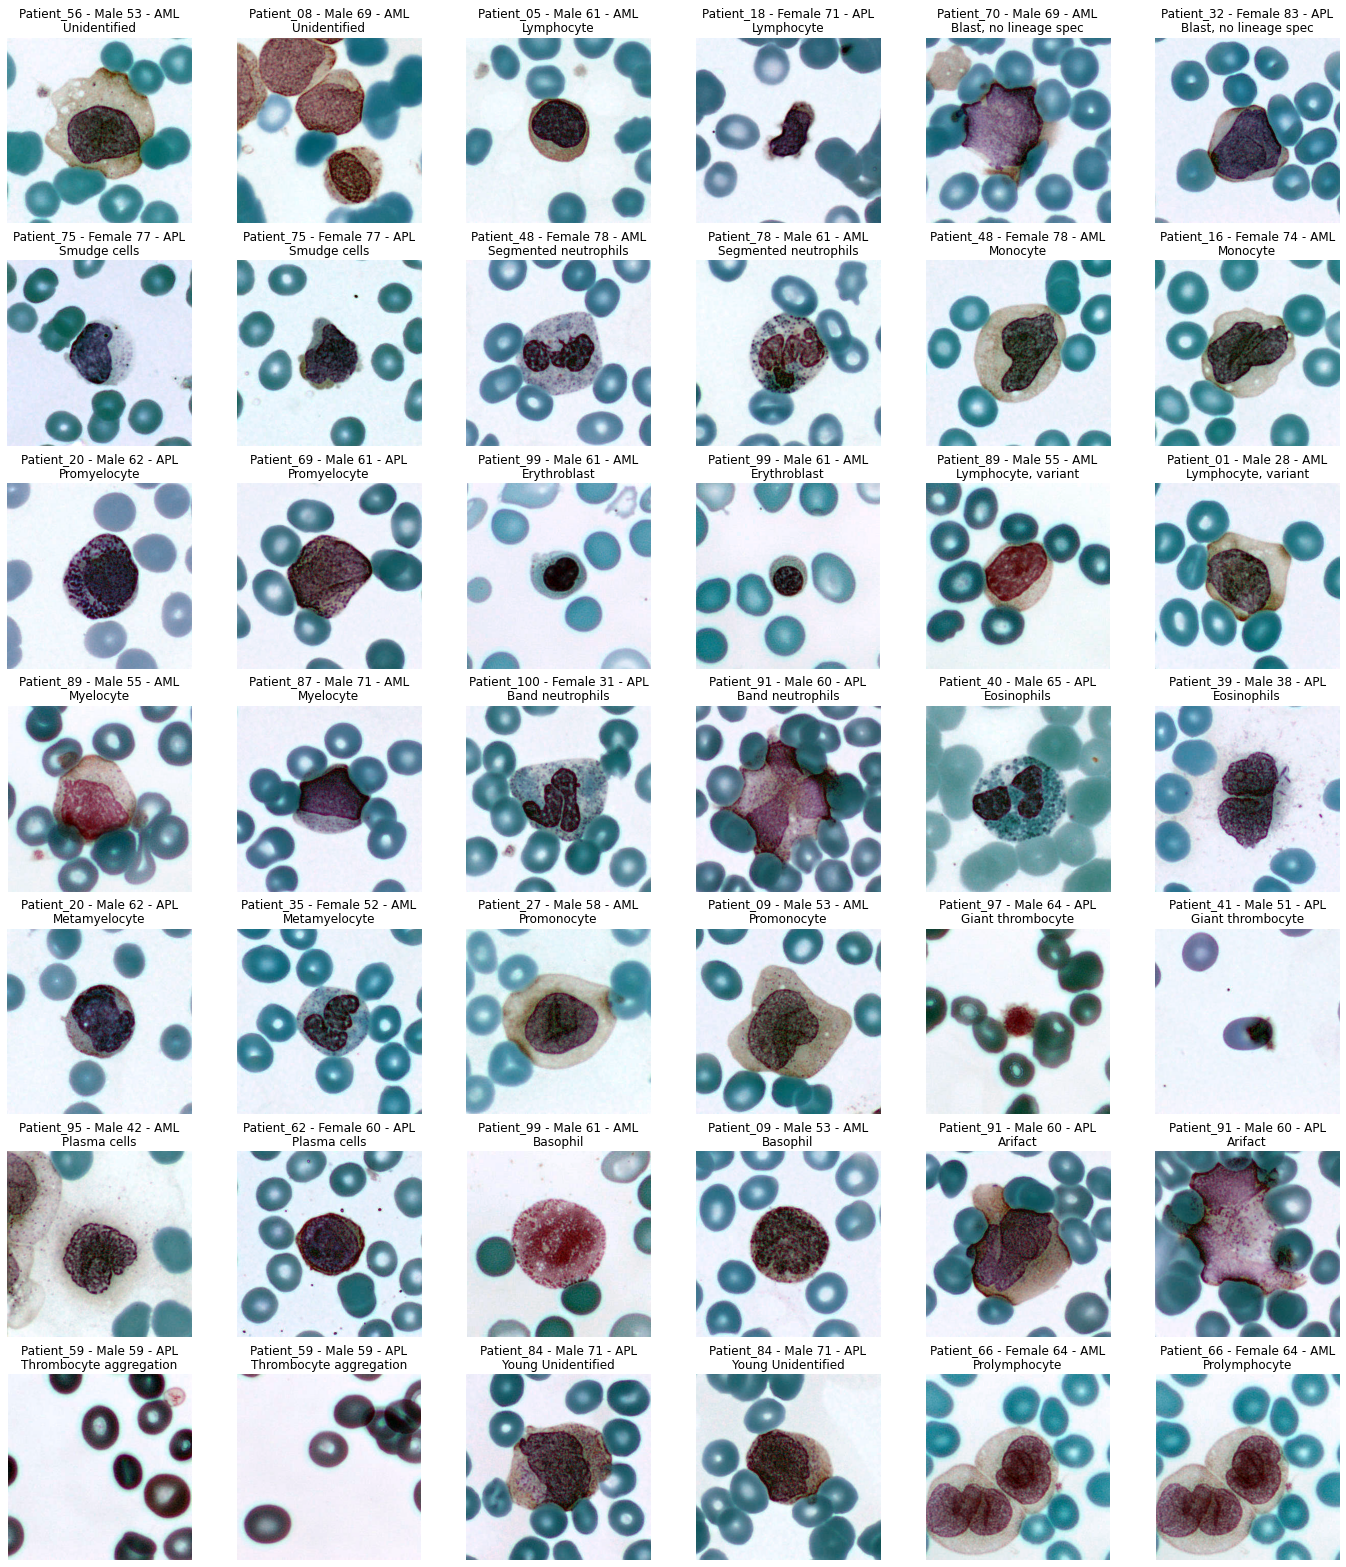

In [114]:
list=show_blood_cells(df,viz_opt='WB',npc=2)

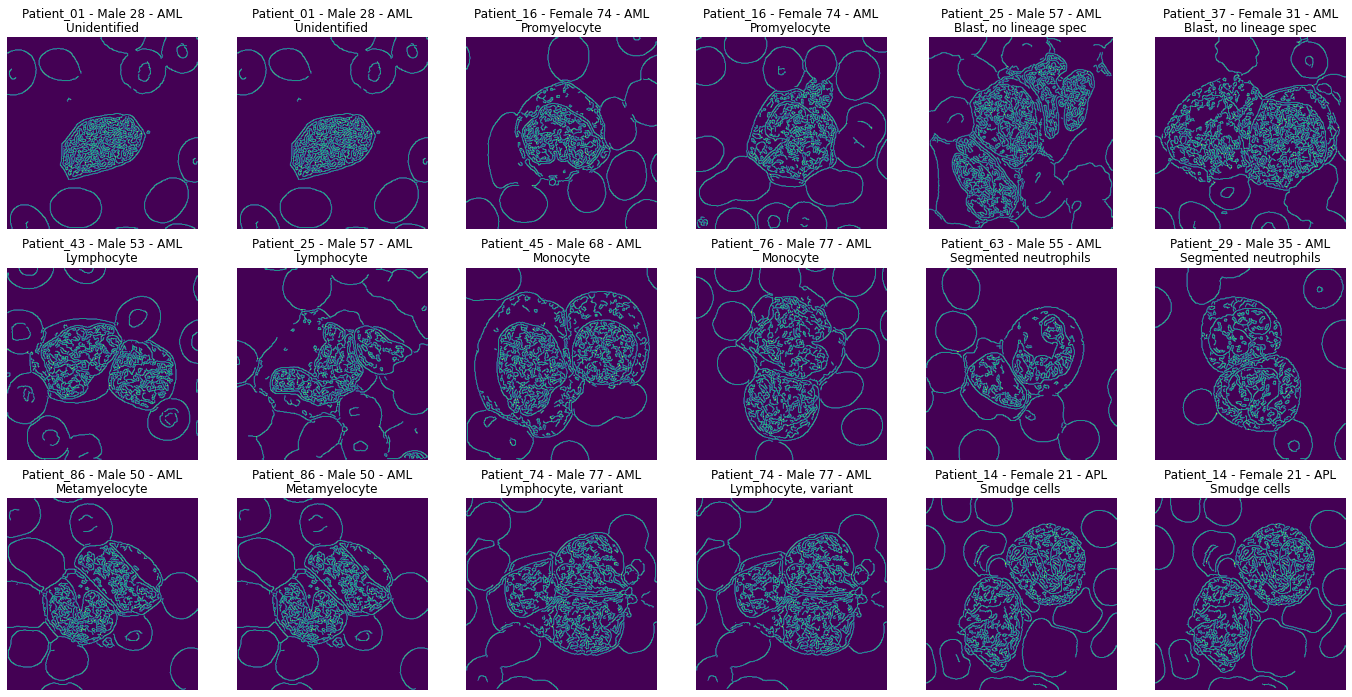

cell_type          img_name img_code  \
10753            Unidentified  SMU_16234536.jpg      SMU   
10753            Unidentified  SMU_16234536.jpg      SMU   
15593            Promyelocyte   PMO_8779255.jpg      PMO   
15603            Promyelocyte   PMO_8779350.jpg      PMO   
14444  Blast, no lineage spec    MO_6394496.jpg       MO   
15404  Blast, no lineage spec    BA_6611790.jpg       BA   
14642              Lymphocyte    MO_7616833.jpg       MO   
14446              Lymphocyte    MO_6394626.jpg       MO   
2342                 Monocyte    BL_8476508.jpg       BL   
3087                 Monocyte   BL_11726465.jpg       BL   
6750    Segmented neutrophils    LY_9355561.jpg       LY   
15217   Segmented neutrophils   BNE_7534371.jpg      BNE   
15414           Metamyelocyte   BA_18130756.jpg       BA   
15414           Metamyelocyte   BA_18130756.jpg       BA   
3026      Lymphocyte, variant    BL_7383818.jpg       BL   
3026      Lymphocyte, variant    BL_7383818.jpg       BL   
8754             Smudge cells  SNE_13158513.jpg      SNE   
8754             Smudge cells  SNE_13158513.jpg      SNE   

                   cell_type2  
10753            Smudge cells  
10753            Smudge cells  
15593             Promonocyte  
15603             Promonocyte  
14444                Monocyte  
15404                Basophil  
14642                Monocyte  
14446                Monocyte  
2342   Blast, no lineage spec  
3087   Blast, no lineage spec  
6750               Lymphocyte  
15217        Band neutrophils  
15414                Basophil  
15414                Basophil  
3026   Blast, no lineage spec  
3026   Blast, no lineage spec  
8754    Segmented neutrophils  
8754    Segmented neutrophils

In [40]:
list=show_blood_cells(df[df.isCellTypeSure==False],viz_opt='edges',npc=2)
list[['cell_type','img_name','img_code','cell_type2']]

In [117]:
# ---------- Visualization Seaborn -------------
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

C:\Users\luap_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luap_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


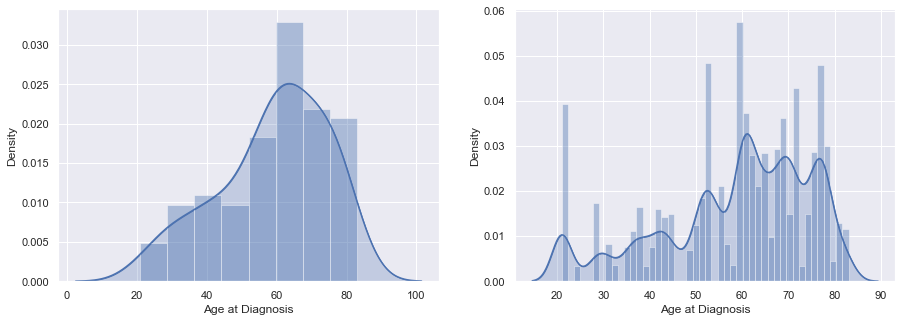

In [170]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(3*5,1*5))
sns.distplot(x=master['Age at Diagnosis'], hist=True, kde= True,ax=ax1);
sns.kdeplot(master['Age at Diagnosis'], shade=True,ax=ax1);

sns.distplot(x=df['Age at Diagnosis'], hist=True, kde= True,ax=ax2);
sns.kdeplot(df['Age at Diagnosis'], shade=True,ax=ax2);

# ==> population globalement agée (entre 60 et 70 ans)
# certains ages sont plus représenté lorsque l'on passe au nombre d'images présentes dans le dataset

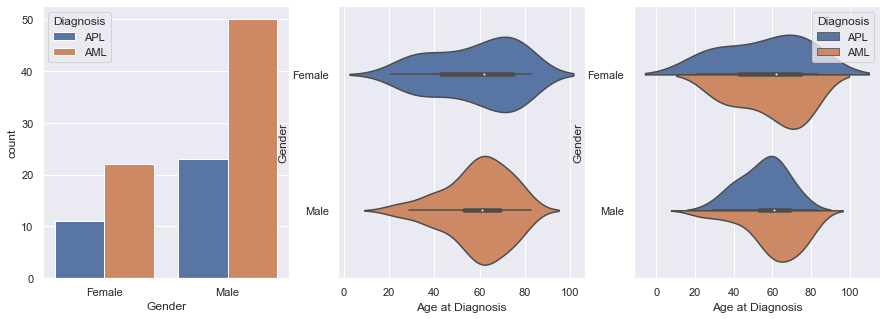

In [157]:
# type des patients:
fig, axis = plt.subplots(1,3,figsize=(3*5,1*5))
sns.countplot(data=master,x='Gender', hue='Diagnosis' ,ax = axis[0]);
sns.violinplot(data=master,y='Gender',x='Age at Diagnosis',ax = axis[1]);
sns.violinplot(data=master,y='Gender',x='Age at Diagnosis',hue='Diagnosis',split=True,ax = axis[2]);
# sns.catplot(data=master,y='Gender',x='Age at Diagnosis',kind='violin',col = 'Diagnosis');

# beaucoup d'hommes AML, peu de femme APL
# repartition plus jeune chez les hommes
# globalement diagnostiqué AML pour des personnes plus agées

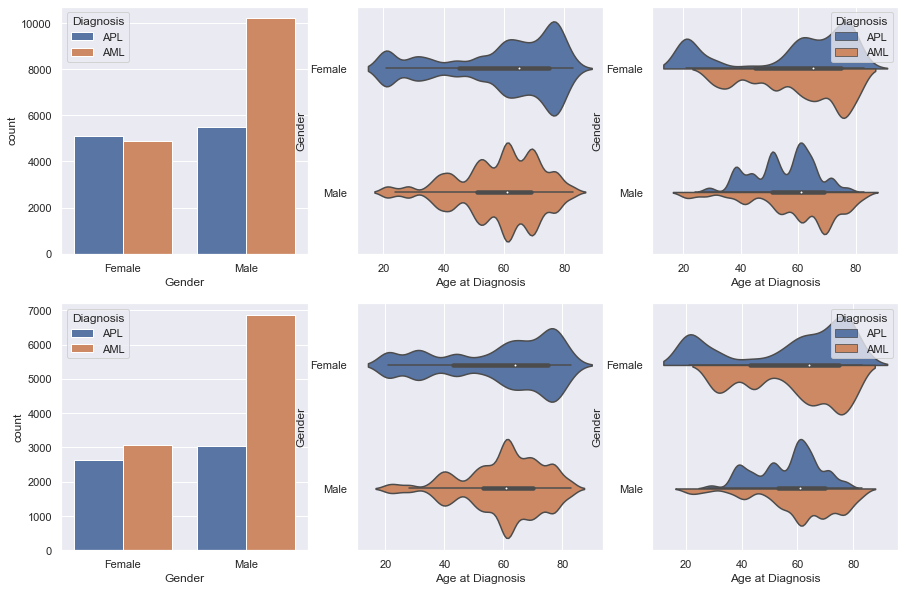

In [162]:
# proratisé au nombre d'images présentes dans tout le dataset:
fig, axis = plt.subplots(2,3,figsize=(3*5,2*5))
sns.countplot(data=df,x='Gender', hue='Diagnosis' ,ax = axis[0,0]);
sns.violinplot(data=df,y='Gender',x='Age at Diagnosis',ax = axis[0,1]);
sns.violinplot(data=df,y='Gender',x='Age at Diagnosis',hue='Diagnosis',split=True,ax = axis[0,2]);
# proratisé au nombre d'images présentes dans le dataset signé (labelisé):
sns.countplot(data=df[df.slide_status=='Signed'],x='Gender', hue='Diagnosis' ,ax = axis[1,0]);
sns.violinplot(data=df[df.slide_status=='Signed'],y='Gender',x='Age at Diagnosis',ax = axis[1,1]);
sns.violinplot(data=df[df.slide_status=='Signed'],y='Gender',x='Age at Diagnosis',hue='Diagnosis',split=True,ax = axis[1,2]);

# même conclusions globalement
# les données se rééquilibre chez les femmes entre les diag APL / AML
# nous avons beaucoup plus de données chez certains patients à priori (symbolisé par les vagues)

In [184]:
# etude des dimensions
# sns.distplot(x=df.img_pixels[df.img_pixels!=df.img_pixels.value_counts().index[0]], hist=True, kde= True);
# sns.kdeplot(df.img_pixels[df.img_pixels!=df.img_pixels.value_counts().index[0]], shade=True);